**Выводы в конце**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest, ttest_ind

In [2]:
data = pd.read_csv("experiment_lesson_4.csv")

order_id - id заказа

delivery_time - время доставки в минутах

district - район доставки

experiment_group - экспериментальная группа

In [3]:
data.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [4]:
data.tail()

,order_id,delivery_time,district,experiment_group
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test
20195,13501,41.0,Central,test


**Часть 1 (тест).**

Задание 1.

Статистические гипотезы:

H0: Разницы между средним временем доставки в тестовой и контрольной группе нет

H1: Разница между средним временем доставки в тестовой и контрольной группе есть

Задание 2.

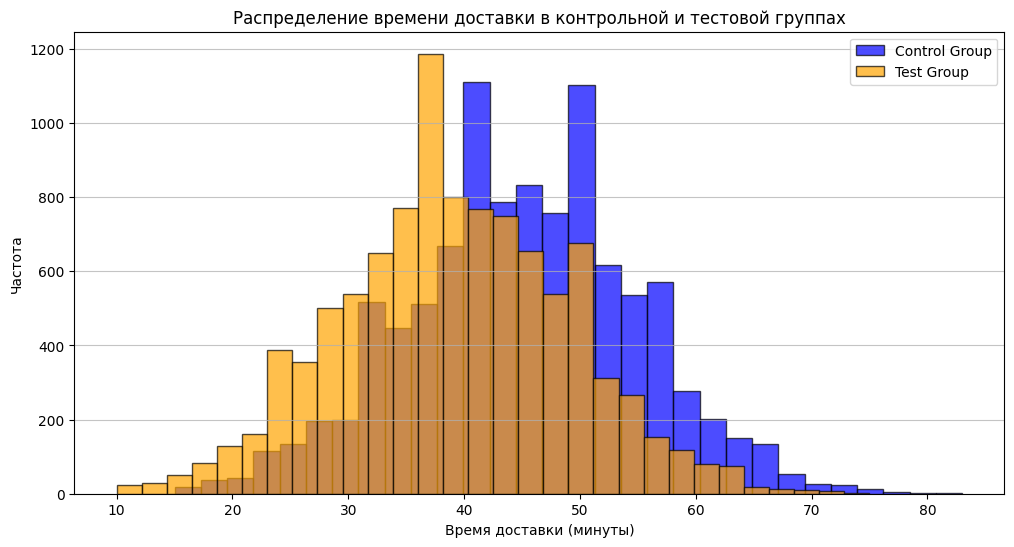

In [5]:
control_group = data[data['experiment_group'] == 'control']['delivery_time']
test_group = data[data['experiment_group'] == 'test']['delivery_time']

plt.figure(figsize=(12, 6))
plt.hist(control_group, bins=30, alpha=0.7, label='Control Group', color='blue', edgecolor='black')
plt.hist(test_group, bins=30, alpha=0.7, label='Test Group', color='orange', edgecolor='black')
plt.xlabel('Время доставки (минуты)')
plt.ylabel('Частота')
plt.title('Распределение времени доставки в контрольной и тестовой группах')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

Задание 3.

In [6]:
control_count = control_group.count()
test_count = test_group.count()
difference = abs(control_count - test_count)
print(f"Количество наблюдений: Контрольная группа - {control_count}, Тестовая группа - {test_count}")
print(f"Разница в наблюдениях: {difference}")

Количество наблюдений: Контрольная группа - 10092, Тестовая группа - 10104
Разница в наблюдениях: 12


Задание 4.

In [7]:
control_normal_test = normaltest(control_group)
test_normal_test = normaltest(test_group)
print(f"Нормальность контрольной группы: {control_normal_test}")
print(f"Нормальность тестовой группы: {test_normal_test}")


Нормальность контрольной группы: NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)
Нормальность тестовой группы: NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)


Задание 5.

In [8]:
control_std = control_group.std()
print(f"Стандартное отклонение в контрольной группе: {control_std:.2f}")

Стандартное отклонение в контрольной группе: 9.99


Задание 6.

In [9]:
test_std = test_group.std()
print(f"Стандартное отклонение в тестовой группе: {test_std:.2f}")

Стандартное отклонение в тестовой группе: 9.88


Задание 7.

Гипотеза:

H0: μ контрольной =  μ тестовой

H1: μ контрольной >  μ тестовой

In [10]:
ttest_ind(control_group, test_group)

TtestResult(statistic=43.03582663183714, pvalue=0.0, df=20194.0)

Так как у нас односторонний тест, то p-value надо поделить на 2. Но так как у нас он все равно 0, то это ничего не изменит.

In [11]:
 ttest_ind(control_group, test_group).pvalue/2

0.0

In [12]:
t_stat, p_value = ttest_ind(control_group, test_group)
print(f"Статистика t-теста: {t_stat:.0f}")

Статистика t-теста: 43


Задание 8.

In [13]:
control_mean = control_group.mean()
test_mean = test_group.mean()
percent_change = ((test_mean - control_mean) / control_mean) * 100
print(f"Среднее время в контрольной группе: {control_mean:.2f}")
print(f"Среднее время в тестовой группе: {test_mean:.2f}")
print(f"Изменение среднего времени (в процентах): {percent_change:.2f}%")

Среднее время в контрольной группе: 45.07
Среднее время в тестовой группе: 39.05
Изменение среднего времени (в процентах): -13.35%


**Часть 2 (выводы).**

Научное заключение:
1. Нулевая гипотеза о равенстве средних отклоняется (p-value = 0.0000) в пользу альтернативной.
2. Среднее время доставки в тестовой группе (39.05 минут) значительно ниже, чем в контрольной (45.07 минут).
3. Стандартное отклонение в тестовой группе (9.88) схоже с контрольной (9.99).

Следовательно, новый алгоритм улучшает эффективность доставки.


Заключение для бизнеса:

1. Новый алгоритм позволяет доставлять быстрее.
2. Среднее время доставки снизилось на -13.35%.
3. Рекомендуется внедрить новый алгоритм для всех курьеров, так как это повысит общую производительность.